In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


In [2]:
# printitng the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train: "+ str(x_train.shape))

print ("Number of samples in our training data: "+ str(len(x_train)))
print ("Number of labels in our training data: "+ str(len(y_train)))
print ("Number of samples in our test data: "+ str(len(x_test)))
print ("Number of labels in our test data: "+ str(len(y_test)))
print ("Dimensions of x_train:"+ str(x_train[0].shape))
print ("Labels in y_train:"+ str(y_train.shape))
print ("Dimensions of x_test:"+ str(x_test[0].shape))
print ("Labels in y_test: "+ str(y_test.shape))

Initial shape or dimensions of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000
Dimensions of x_train:(28, 28)
Labels in y_train:(60000,)
Dimensions of x_test:(28, 28)
Labels in y_test: (10000,)


In [3]:
# Visualising Data Using CV2
# import cv2


# for i in range(0,6):
#     random_num = np.random.randint(0, len(x_train))
#     img = x_train[random_num]
#     window_name = 'Random Sample #'+ str(i)
#     cv2.imshow(window_name, img)
#     cv2.waitKey(0)

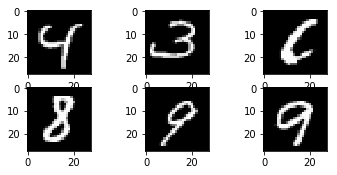

In [4]:
# Visualising Data Using Matplotlib
import matplotlib.pyplot as plt

plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))


plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

In [5]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our data in a right 'shape' needed for Keras
# We need to add a 4th dimension to our data thereby changing our original image shape of (60000,28,28) to (6000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols, 1)

# Storing the shape in single image
input_shape = (img_rows, img_cols, 1)

#  Changing the image to float32 datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#  Normalizing our data by changing the range from (0 to 225) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'testsamples')

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 testsamples


In [6]:
from keras.utils import np_utils

# Now we one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count out number of columns in out hot encoded matrix
print("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Create Our Model**

* We're constructing a simple but effective CNN that uses 32 filters of size 3x3
* We've added a 2nd CONV layer of 64 filters of the same size 3x3
* We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
* We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
* How we apply a dropout where P is set to 0.5
* Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as k
from keras.optimizers import SGD

#  Create Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

**Train our Model**

* We place our formatted data as the inputs and set the batch size, number of epochs
* We store our model's training results for plotting in future
* We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [9]:
batch_size = 8
epochs = 10

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Train Score: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 537us/step - loss: 0.3490 - acc: 0.8931 - val_loss: 0.0897 - val_acc: 0.9719
Epoch 2/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.1338 - acc: 0.9597 - val_loss: 0.0548 - val_acc: 0.9823
Epoch 3/10
60000/60000 [==============================] - 28s 465us/step - loss: 0.0996 - acc: 0.9699 - val_loss: 0.0413 - val_acc: 0.9863
Epoch 4/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.0810 - acc: 0.9756 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.0700 - acc: 0.9788 - val_loss: 0.0367 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 28s 462us/step - loss: 0.0610 - acc: 0.9816 - val_loss: 0.0340 - val_acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0549 - acc: 0.9828 - val_loss: 0.

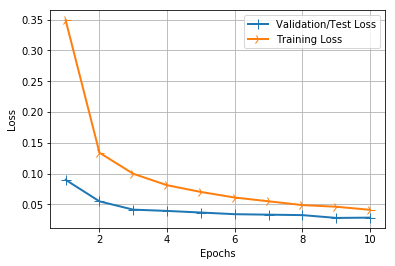

In [10]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

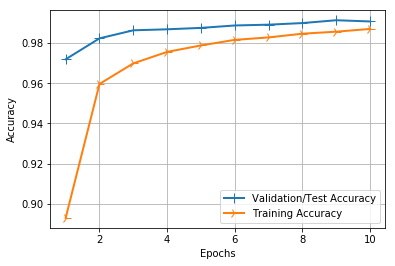

In [11]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**Save Model**

In [12]:
model.save('mnist_sample_cnn_10_epochs.h5')
print('Model Saved')

Model Saved


In [13]:
from keras.models import load_model
classifier = load_model('mnist_sample_cnn_10_epochs.h5')

In [14]:
np.argmax(classifier.predict(x_test[0:1]))

7

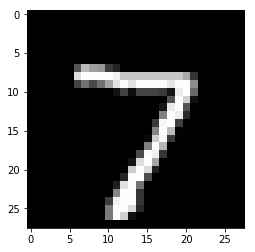

In [15]:
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

**Generating the diagram of the model architechture**

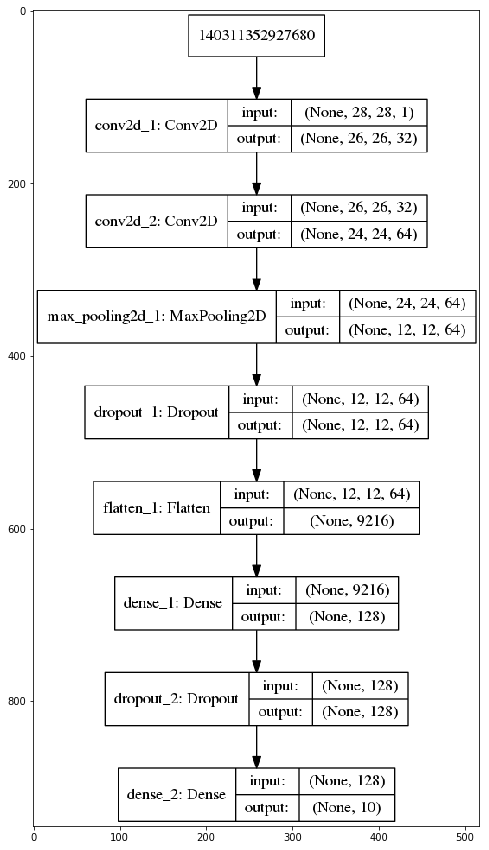

In [16]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)